<a href="https://colab.research.google.com/github/SamuelGuerrero/Machine-Learning/blob/main/Backpropagation%20Iris%20Data%20Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Librerías que se usarán**

In [ ]:
import numpy as np                                             #Para la manipulación de matricez
import matplotlib.pyplot as plt                                #Para las gráficas necesarias
from sklearn import datasets                                   #Para cargar los datos del cojunto Iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder  #Para la estandarización y transformación a la notación One Hot Encoder

## **Funciones**

In [ ]:
def convertirTarget(Y):
  newY = [np.array([])] * len(Y)
  for i in np.arange(len(Y)):
    newY[i] = [Y[i]]
  return newY

In [ ]:
def derSigmoide(y):
    return y * (1-y)

In [ ]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

In [ ]:
def crearMatricesPesos(dimensiones):
  Ws = []
  i = 1
  for dimension in dimensiones:
   Ws.append(np.random.random((dimension,dimensiones[i]))) 
   i += 1
   if i == len(dimensiones):
     break
  return Ws

In [ ]:
def forward(Ws, dimensiones, X):
  X  = X.reshape((1,dimensiones[0]))
  V  = [] #Salida de cada una de las capas
  Y  = [] #Salida de cada una de las capas aplicando la función de activación (Sigmoide)
  Yp = [] #Valores con la derivada de la función de activación para el decenso de la gradiente

  for i in np.arange(len(dimensiones)-1):
    if (i == 0): 
      V.append (X.dot(Ws[i])) 
    else:
      V.append (Y[i-1].dot(Ws[i]))
    Y.append (sigmoide(V[i]))
    Yp.append(derSigmoide(Y[i]))
  
  return V,Y,Yp

In [ ]:
def backpropagation(X,W,Y,Yp,Yd,alpha):
  #X : Valores de entrada
  #W : Pesos de la capa
  #Yd: Salida deseada

  error = [np.array([])] * len(Y)
  dw    = [np.array([])] * len(Y)
  incW  = [np.array([])] * len(Y)
  X = X[0].reshape([1,X[0].shape[0]])

  for i in np.arange(len(Y)-1,-1,-1):
    if (i == len(Y)-1):
      #capa de salida
      error[i] = Yd - Y[i]
      dw[i]    = error[i] * Yp[i]
      incW[i]  = Y[i-1].T.dot(dw[i])
    elif (i==0):
      #capa de entrada
      error[i] = dw[i+1].dot(W[i+1].T)
      dw[i]    = error[i]*Yp[i]
      incW[i]  = X.T.dot(dw[i])
    else: 
      ## hidden layers
      error[i] = dw[i+1].dot(W[i+1].T)
      dw[i]    = error[i] * Yp[i]
      incW[i]  = Y[i-1].T.dot(dw[i])
    W[i] = W[i] + alpha*incW[i]

  return W

## **Transformación de la salida de la red a One Hot Encoder y Estandarización de los datos**


In [ ]:
X  = datasets.load_iris().data
Y  = datasets.load_iris().target
YY = Y

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
clases = [[0],[1],[2]]
enc.fit(clases)
Yd = enc.transform(convertirTarget(Y)).toarray()
Yd[0:Y.shape[0]:15]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
#Estandarización de los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Estructura de la red**

In [ ]:
#Declaración de las dimensiones de las capas de la red
dimensiones = [4,12,8,3]
#Se declaran los pesos aleatorios de todas las capas de la red
Ws = crearMatricesPesos(dimensiones)

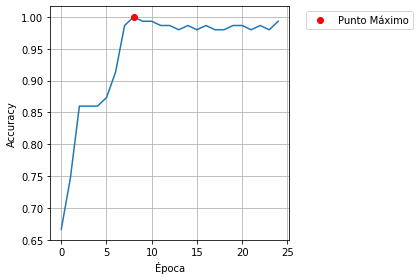

In [ ]:
numeroEpocas = 25
alpha = 1
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

historialAccuracy = np.array([])
pMaximoX = 0
pMaximoY = 0 

for epoca in range(numeroEpocas):
  score = np.zeros((X.shape[0]))
  for index in indices:
    V,Y,Yp = forward(Ws,dimensiones,X[index])
    Ws = backpropagation([X[index,:]],Ws,Y,Yp,[Yd[index,:]],alpha)
    Vn,Yn,Ypn = forward(Ws,dimensiones,X[index])
    last = len(Y)-1
    score[index] = Yn[last].argmax()
  
  accuracy = (score == YY).mean()
  if(accuracy >= pMaximoY):
    pMaximoY = accuracy
    pMaximoX = epoca
    mejorRed = Ws
  historialAccuracy = np.append(historialAccuracy,accuracy)

plt.plot(historialAccuracy)
plt.plot(pMaximoX,pMaximoY,"o",color="red",label="Punto Máximo")
plt.grid()
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

In [ ]:
print(historialAccuracy)

[0.63333333 0.7        0.84       0.85333333 0.85333333 0.85333333
 0.86       0.86666667 0.94       0.96       0.96666667 0.98
 0.98       0.98       0.98       0.97333333 0.98       0.98
 0.97333333 0.98       0.98       0.98666667 0.98       0.98
 0.98      ]


In [ ]:
print(pMaximoX,pMaximoY)

21 0.9866666666666667


In [ ]:
print(mejorRed)

[array([[ 1.23893518, -0.65787131,  0.71901602,  0.20404843, -0.01690238,
         0.73817715,  0.81213823,  0.81352998, -0.00546854, -0.2141099 ,
        -0.78957898,  1.26139453],
       [-0.1723098 ,  0.38802104, -0.63306839, -1.04524772,  0.34676186,
        -0.75806591, -0.05366319, -1.07698538, -0.55507726, -0.18845458,
         0.97831605, -0.26157955],
       [ 1.06731228, -0.68009962,  1.38880387,  1.68752233,  1.60731477,
         1.51179307, -2.09778632,  1.54692765,  1.20765029,  1.33475032,
        -0.08709274, -2.54924569],
       [ 1.46026024, -1.65018577,  1.15655289,  0.94752144,  1.66423801,
         0.875236  , -1.87313679,  0.87355711,  1.45997093,  1.60624333,
        -1.45286766, -2.03261997]]), array([[ 5.61869783e-01,  4.09678643e-01,  4.43203917e-01,
         1.18187992e+00,  1.28714408e-01,  3.73939833e-01,
         9.08026183e-01, -4.96054788e-02],
       [-1.28657394e+00, -5.32655756e+00,  6.59582109e-01,
        -1.42768330e+00,  4.23970509e-01,  8.00419778